# Explore here

In [1]:
# Your code here
# Handle imports up-front
import pandas as pd

In [2]:
raw_data_df=pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

In [3]:
raw_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
data_df=raw_data_df[['MedInc', 'Latitude', 'Longitude']]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


In [5]:
# Your code here...
from sklearn.model_selection import train_test_split

X = data_df.drop(columns=['MedInc'])  
y = data_df['MedInc']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (16512, 2)
X_test (4128, 2)
y_train (16512,)
y_test (4128,)


In [6]:
# Your code here...
import numpy as np
from scipy.stats import zscore

data_df_cleaned = data_df.dropna()

data_df_cleaned = data_df.fillna(data_df.mean())


# The dataset is pretty clean already, and we only have three features - but it never hurts to plot a few histograms to take a look at the shape of the data

In [7]:
z_scores = np.abs(zscore(data_df.select_dtypes(include=np.number)))

data_df_cleaned = data_df[(z_scores < 3).all(axis=1)]

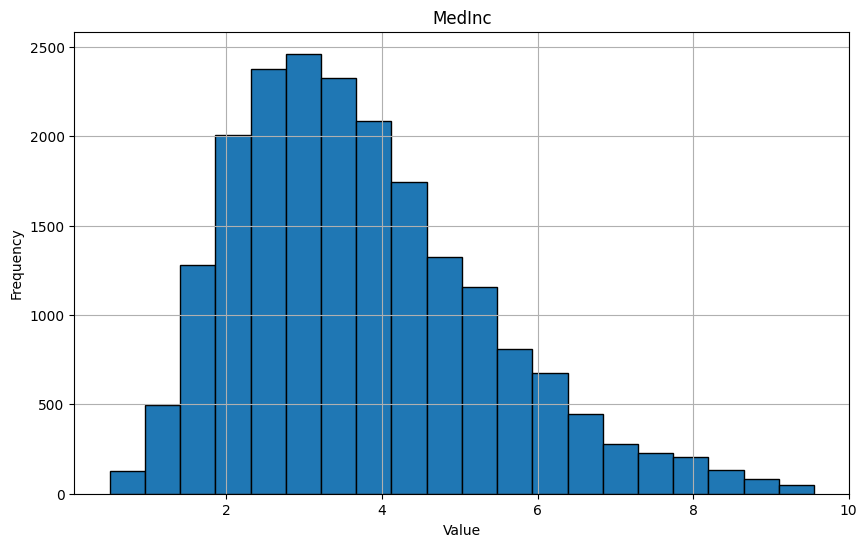

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data_df_cleaned['MedInc'].hist(bins=20, edgecolor='black')

plt.title('MedInc')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

In [9]:
# The 4Geeks provided solution skips this part - but it's important! If one feature has a much larger range than the others, it will be given more importance during distance calculations...
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numeric = data_df_cleaned.select_dtypes(include=['float64', 'int64']).columns

data_df_cleaned[numeric] = scaler.fit_transform(data_df_cleaned[numeric])

print(data_df_cleaned.head())


     MedInc  Latitude  Longitude
0  2.857822  1.047603  -1.328368
1  2.842992  1.038259  -1.323378
2  2.192476  1.033587  -1.333358
3  1.186606  1.033587  -1.338349
4  0.066958  1.033587  -1.338349


/tmp/ipykernel_4055/214754718.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_cleaned[numeric] = scaler.fit_transform(data_df_cleaned[numeric])


In [10]:
# Use Scikit-learn's KMeans()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate a sample dataset
X, _ = make_blobs(n_samples = 300, centers = 3, random_state = 42)

# Training the model
model = KMeans(n_clusters = 3, random_state = 42)
model.fit(X)

# Making predictions with new data
new_data = np.array([[2, 3], [0, 4], [3, 1]])
predictions = model.predict(new_data)

In [11]:
# Add the clusters from the KMeans model as the new label - now we have turned our unsupervised machine learning problem into a supervised one!
model_unsup = KMeans(n_clusters=6, n_init="auto", random_state=42)
model_unsup.fit(X_train)

y_train = list(model_unsup.labels_)
X_train["cluster"] = y_train
X_train.head()

,Latitude,Longitude,cluster
14196,32.71,-117.03,1
8267,33.77,-118.16,1
17445,34.66,-120.48,3
14265,32.69,-117.11,1
2271,36.78,-119.80,5


In [12]:
# If you scaled the data properly, you should notice that your clusters are much cleaner than the 4Geeks solution - which basically just cuts california in half and then stratifies it by median income because that was the feature with the largest range in values!
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate a sample dataset
X, _ = make_blobs(n_samples = 300, centers = 3, random_state = 42)

# Training the model
model = KMeans(n_clusters = 3, random_state = 42)
model.fit(X)

# Making predictions with new data
new_data = np.array([[2, 3], [0, 4], [3, 1]])
predictions = model.predict(new_data)

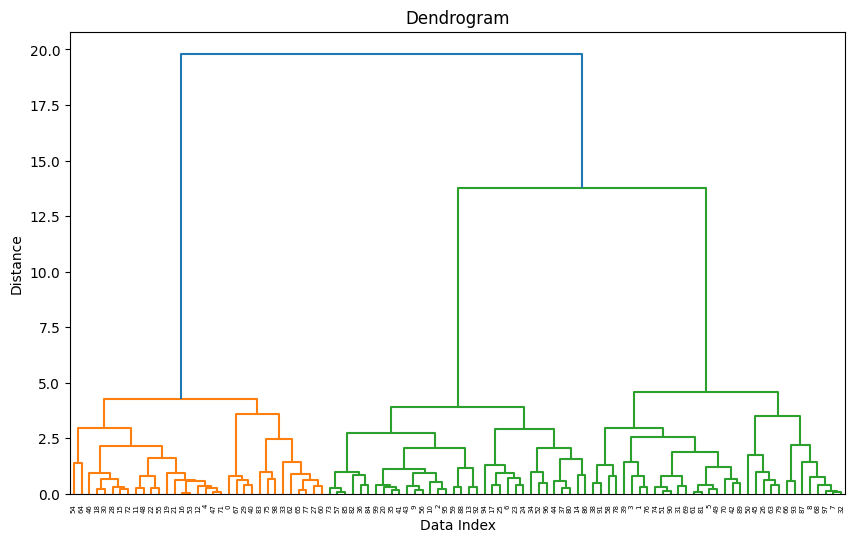

Accuracy of the classifier: 100.00%


In [13]:
# Re-seperate the feaurtes and labels to train a supervised classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.cluster.hierarchy import linkage, dendrogram

X, y = make_blobs(n_samples=100, centers=3, random_state=42)

Z = linkage(X, method="complete")

plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title("Dendrogram")
plt.xlabel("Data Index")
plt.ylabel("Distance")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the classifier: {accuracy * 100:.2f}%")

In [14]:
# Pick any classification model you like
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a PCA object and fit it to the data
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X)

In [15]:
# You can re-use the 'cross_val' helper function we wrote for the naive bayes project here (look in src/utils.py in my copy of the repo. from the course materials repo. list).
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=200)  

cv_scores = cross_val_score(clf, X_pca, y, cv=5, scoring='accuracy')

print(f"Cross-validation scores (Logistic Regression): {cv_scores}")
print(f"Mean accuracy: {cv_scores.mean():.4f}")

clf_rf = RandomForestClassifier(random_state=42)

cv_scores_rf = cross_val_score(clf_rf, X_pca, y, cv=5, scoring='accuracy')

print(f"Cross-validation scores (Random Forest): {cv_scores_rf}")
print(f"Mean accuracy: {cv_scores_rf.mean():.4f}")

Cross-validation scores (Logistic Regression): [0.93333333 1.         0.93333333 0.93333333 1.        ]
Mean accuracy: 0.9600
Cross-validation scores (Random Forest): [0.96666667 0.9        0.93333333 0.93333333 0.93333333]
Mean accuracy: 0.9333


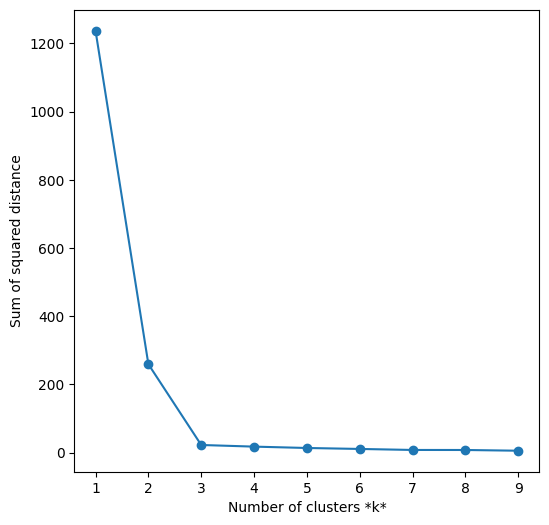

In [16]:
# Your code here...
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_test)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');